# Part I - Ford GoBike System Data Exploration
## by Blessing Egharevba

## Introduction
> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.



## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
ford_df = pd.read_csv("201902-fordgobike-tripdata.csv")
ford_df.head()

duration_sec                start_time                  end_time  \
0         52185  2019-02-28 17:32:10.1450  2019-03-01 08:01:55.9750   
1         42521  2019-02-28 18:53:21.7890  2019-03-01 06:42:03.0560   
2         61854  2019-02-28 12:13:13.2180  2019-03-01 05:24:08.1460   
3         36490  2019-02-28 17:54:26.0100  2019-03-01 04:02:36.8420   
4          1585  2019-02-28 23:54:18.5490  2019-03-01 00:20:44.0740   

   start_station_id                                start_station_name  \
0              21.0  Montgomery St BART Station (Market St at 2nd St)   
1              23.0                     The Embarcadero at Steuart St   
2              86.0                           Market St at Dolores St   
3             375.0                           Grove St at Masonic Ave   
4               7.0                               Frank H Ogawa Plaza   

   start_station_latitude  start_station_longitude  end_station_id  \
0               37.789625              -122.400811            13.0   
1               37.791464              -122.391034            81.0   
2               37.769305              -122.426826             3.0   
3               37.774836              -122.446546            70.0   
4               37.804562              -122.271738           222.0   

                               end_station_name  end_station_latitude  \
0                Commercial St at Montgomery St             37.794231   
1                            Berry St at 4th St             37.775880   
2  Powell St BART Station (Market St at 4th St)             37.786375   
3                        Central Ave at Fell St             37.773311   
4                         10th Ave at E 15th St             37.792714   

   end_station_longitude  bike_id   user_type  member_birth_year  \
0            -122.402923     4902    Customer             1984.0   
1            -122.393170     2535    Customer                NaN   
2            -122.404904     5905    Customer             1972.0   
3            -122.444293     6638  Subscriber             1989.0   
4            -122.248780     4898  Subscriber             1974.0   

  member_gender bike_share_for_all_trip  
0          Male                      No  
1           NaN                      No  
2          Male                      No  
3         Other                      No  
4          Male                     Yes

In [3]:
ford_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [4]:
ford_df.bike_share_for_all_trip.value_counts()

No     166053
Yes     17359
Name: bike_share_for_all_trip, dtype: int64

In [5]:
ford_df.member_gender.value_counts()

Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64

In [6]:
ford_df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

### Quality Issues
> - Enormous data format for start_time, End_time, start_station_id, bike_id, user_type, member_gender, bike_share_for_all_trip
> - Missing values for start_station_id, start_station_name, end_station_id, end_station_name, member_birth_year, member_gender

#### Issue 1: Dealing with missing values

In [7]:
# fill missing values in member_gender with "other"
ford_df["member_gender"] = ford_df["member_gender"].fillna("Other")

# fill missing values in member_birth_year with the year median
ford_df["member_birth_year"] = ford_df["member_birth_year"].fillna(ford_df["member_birth_year"].median())

# drop rows with missing values in start_station_id and end_station_id
ford_df.dropna(subset=['start_station_id'], inplace = True)

In [8]:
ford_df.isna().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

#### Issue 2: Dealing with enormous datatype

In [9]:
# convert start_time and end_time to datetime
ford_df['start_time'] = pd.to_datetime(ford_df['start_time'])
ford_df['end_time'] = pd.to_datetime(ford_df['end_time'])

# convert start_station_id and end_station_id to string
ford_df['start_station_id'] = ford_df['start_station_id'].astype("Int32").astype("str")
ford_df['end_station_id'] = ford_df['end_station_id'].astype("Int32").astype("str")

# convert bike_id to string
ford_df['bike_id'] = ford_df['bike_id'].astype("str")

# convert user_type, member_gender, bike_share_for_all_trip to category
ford_df['user_type'] = ford_df['user_type'].astype("category")
ford_df['member_gender'] = ford_df['member_gender'].astype("category")
ford_df['bike_share_for_all_trip'] = ford_df['bike_share_for_all_trip'].astype("category")

# convert member_bith_year from float to int
ford_df.member_birth_year = ford_df.member_birth_year.astype('Int32')


In [10]:
ford_df.tail()

duration_sec              start_time                end_time  \
183407           480 2019-02-01 00:04:49.724 2019-02-01 00:12:50.034   
183408           313 2019-02-01 00:05:34.744 2019-02-01 00:10:48.502   
183409           141 2019-02-01 00:06:05.549 2019-02-01 00:08:27.220   
183410           139 2019-02-01 00:05:34.360 2019-02-01 00:07:54.287   
183411           271 2019-02-01 00:00:20.636 2019-02-01 00:04:52.058   

       start_station_id                                start_station_name  \
183407               27                           Beale St at Harrison St   
183408               21  Montgomery St BART Station (Market St at 2nd St)   
183409              278                            The Alameda at Bush St   
183410              220                       San Pablo Ave at MLK Jr Way   
183411               24                             Spear St at Folsom St   

        start_station_latitude  start_station_longitude end_station_id  \
183407               37.788059              -122.391865            324   
183408               37.789625              -122.400811             66   
183409               37.331932              -121.904888            277   
183410               37.811351              -122.273422            216   
183411               37.789677              -122.390428             37   

                           end_station_name  end_station_latitude  \
183407  Union Square (Powell St at Post St)             37.788300   
183408                3rd St at Townsend St             37.778742   
183409            Morrison Ave at Julian St             37.333658   
183410             San Pablo Ave at 27th St             37.817827   
183411                  2nd St at Folsom St             37.785000   

        end_station_longitude bike_id   user_type  member_birth_year  \
183407            -122.408531    4832  Subscriber               1996   
183408            -122.392741    4960  Subscriber               1984   
183409            -121.908586    3824  Subscriber               1990   
183410            -122.275698    5095  Subscriber               1988   
183411            -122.395936    1057  Subscriber               1989   

       member_gender bike_share_for_all_trip  
183407          Male                      No  
183408          Male                      No  
183409          Male                     Yes  
183410          Male                      No  
183411          Male                      No

In [11]:
ford_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183215 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183215 non-null  int64         
 1   start_time               183215 non-null  datetime64[ns]
 2   end_time                 183215 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  object        
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183215 non-null  float64       
 6   start_station_longitude  183215 non-null  float64       
 7   end_station_id           183215 non-null  object        
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183215 non-null  float64       
 10  end_station_longitude    183215 non-null  float64       
 11  bike_id                  183215 non-null  object        
 12  user_type       

### Structure of dataset

> There are 183,411 individual rides in the dataset, with 16 features ('duration_sec', 'start_time', 'end_time', 'start_station_id', 'start_station_name', 'start_station_latitude', 'start_station_longitude', 'end_station_id', 'end_station_name', 'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type', 'member_birth_year', 'member_gender', 'bike_share_for_all_trip'). Some of the variables ate numeric, some string. It can also be noted that some of the variables were formatted wrongly (eg, start_time and end_time formated as string instead of datetime).


### The main feature(s) of interest 

> The meain feature of interest is the Duration taken for rides based on differnt other features.

### Features in the dataset that will help support investigation into the feature(s) of interest?

> I'd suggest that gender, the time of the day, riders type(subscibers or customers) would affect the average duration (secs) taken 

## Univariate Exploration

### Question1: Distribution of seconds spents for the rides 

In [12]:
ford_df["duration_sec"].describe()

count    183215.000000
mean        725.902017
std        1795.078654
min          61.000000
25%         325.000000
50%         514.000000
75%         796.000000
max       85444.000000
Name: duration_sec, dtype: float64

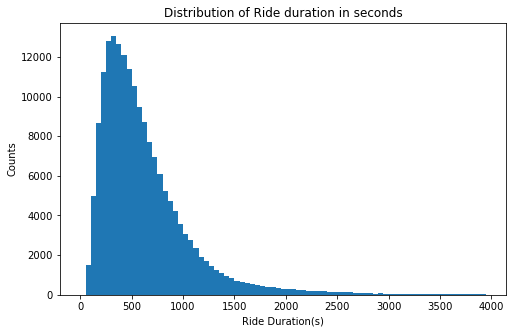

In [13]:
plt.figure(figsize=[8, 5])

bins = np.arange(0,4000, 50) #getting the first 4000secs rides, with a bin size of 50

plt.hist(data = ford_df, x = "duration_sec", bins = bins)

plt.title("Distribution of Ride duration in seconds")
plt.xlabel("Ride Duration(s)")
plt.ylabel("Counts");

> Most rides took between 61(min secs) and 1000secs <br>

We will be taking the log of ride duration to get more insight

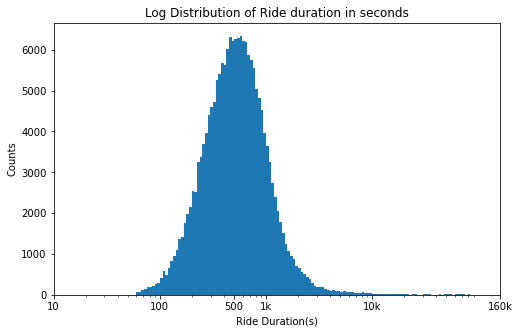

In [14]:
plt.figure(figsize=[8, 5])
log_binsize = 0.025
bins = 10**np.arange(1.2, np.log10(ford_df["duration_sec"].max())+log_binsize, log_binsize)

plt.hist(data = ford_df, x = "duration_sec", bins = bins)
plt.xscale("log")

x_ticks = [10, 100,500,1000, 10000, 160e3]
plt.xticks(x_ticks, [10, 100, 500,"1k", "10k", "160k"])

plt.title("Log Distribution of Ride duration in seconds")
plt.xlabel("Ride Duration(s)")
plt.ylabel("Counts");

> from the plot above, it can further be exploited that most rides used 500secs, falling a normal distribution.

But it can be noted that some rides took above 10,000 secs, but can not be seen on the distribution plot above. Therefore, a log scale of the count side will be plotted

Max duration taken: 85444


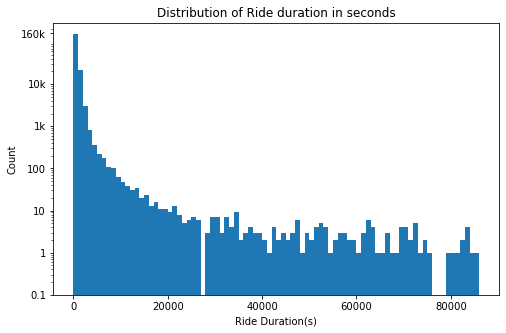

In [15]:
plt.figure(figsize=[8, 5])
bins = np.arange(0, ford_df["duration_sec"].max()+1000, 1000)
plt.hist(data = ford_df, x = "duration_sec", bins = bins)
plt.yscale("log")

y_ticks = [0.1, 1, 10, 100,1000, 10000, 160e3]
plt.yticks(y_ticks, [0.1, 1, 10, 100, "1k", "10k", "160k"])

plt.title("Distribution of Ride duration in seconds")
plt.xlabel("Ride Duration(s)")
plt.ylabel("Count");

print("Max duration taken:",ford_df["duration_sec"].max())

> Though most rides were on the lower duration, with the distribution looking right-skewed, some of the rides also took above 20,000 seconds, with the highest duration being 85444 secs

#### converting to mins to see if we can get the same distribution

In [16]:
# create a new column by converting seconds to mins and then to ints
ford_df["duration_min"] = ford_df["duration_sec"].apply(lambda x : x/60)
ford_df["duration_min"] = np.ceil(ford_df["duration_min"]).astype("int")

# statistical summary of the converted duration
ford_df["duration_min"].describe()

count    183215.000000
mean         12.590165
std          29.919774
min           2.000000
25%           6.000000
50%           9.000000
75%          14.000000
max        1425.000000
Name: duration_min, dtype: float64

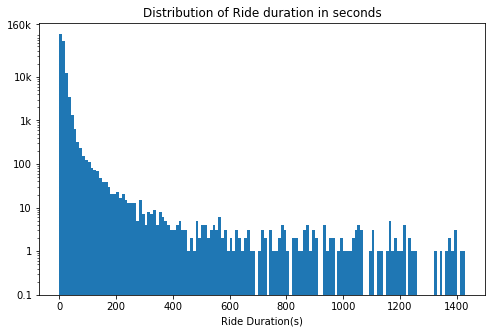

In [17]:
plt.figure(figsize=[8, 5])
bins = np.arange(0, ford_df["duration_min"].max()+10, 10)
plt.hist(data = ford_df, x = "duration_min", bins = bins)
plt.yscale("log")

y_ticks = [0.1, 1, 10, 100,1000, 10000, 160e3]
plt.yticks(y_ticks, [0.1, 1, 10, 100, "1k", "10k", "160k"])

plt.title("Distribution of Ride duration in seconds")
plt.xlabel("Ride Duration(s)");

From the plots above, it can be seen that most of the rides were on the lower duration, with the distribution looking right-skewed.

In [18]:
ford_df.head(1)

duration_sec              start_time                end_time  \
0         52185 2019-02-28 17:32:10.145 2019-03-01 08:01:55.975   

  start_station_id                                start_station_name  \
0               21  Montgomery St BART Station (Market St at 2nd St)   

   start_station_latitude  start_station_longitude end_station_id  \
0               37.789625              -122.400811             13   

                 end_station_name  end_station_latitude  \
0  Commercial St at Montgomery St             37.794231   

   end_station_longitude bike_id user_type  member_birth_year member_gender  \
0            -122.402923    4902  Customer               1984          Male   

  bike_share_for_all_trip  duration_min  
0                      No           870

### Question2: Distribution of user_type

Subscriber    163414
Customer       19801
Name: user_type, dtype: int64


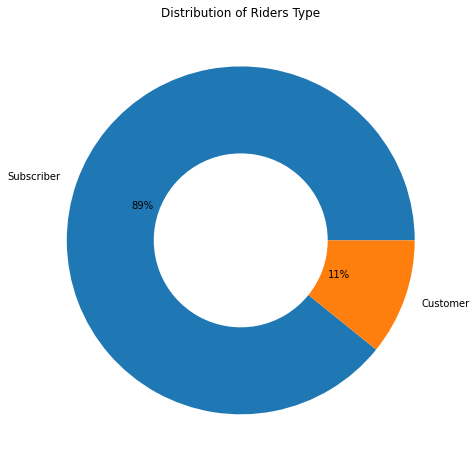

In [19]:
plt.figure(figsize = [10,8])
user_type = ford_df["user_type"].value_counts()
print(user_type)

base_color = sb.color_palette()[0:2]
plt.pie(user_type, labels = user_type.index,
        autopct='%.0f%%',
        wedgeprops = {"width":0.5},
       colors = base_color)


plt.title("Distribution of Riders Type");

> 89% of riders were subscribers, with just 11% as customers

### Question3: Distribution of member_gender

Male      130500
Female     40805
Other      11910
Name: member_gender, dtype: int64


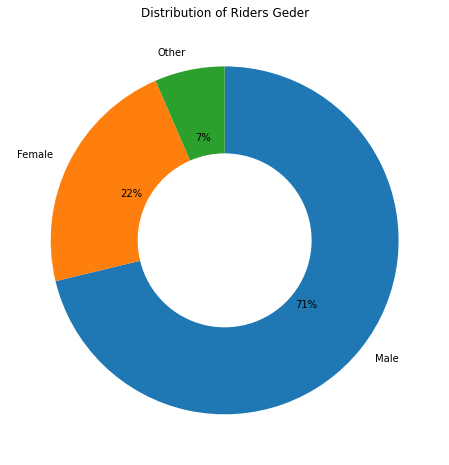

In [20]:
plt.figure(figsize = [10,8])
member_gender = ford_df["member_gender"].value_counts()
print(member_gender)

base_color = sb.color_palette()[0:3]
plt.pie(member_gender, labels = member_gender.index, 
        autopct='%.0f%%',
        wedgeprops = {"width":0.5},
        startangle = 90,
        counterclock = False,
       colors = base_color)

plt.title("Distribution of Riders Geder");

> 71% of riders were male, 22% Female and 7% specified as "others"

### Question4: Distribution of Riders Age

In [21]:
ford_df.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip',
       'duration_min'],
      dtype='object')

In [22]:
# since the ride was taken in 2019, the expected age of the riders will be calculated as at 2019

ford_df["age"] = ford_df["member_birth_year"].apply(lambda x : 2019-x).astype("int")

In [23]:
ford_df["age"].describe()

count    183215.000000
mean         34.097787
std           9.898425
min          18.000000
25%          27.000000
50%          32.000000
75%          38.000000
max         141.000000
Name: age, dtype: float64

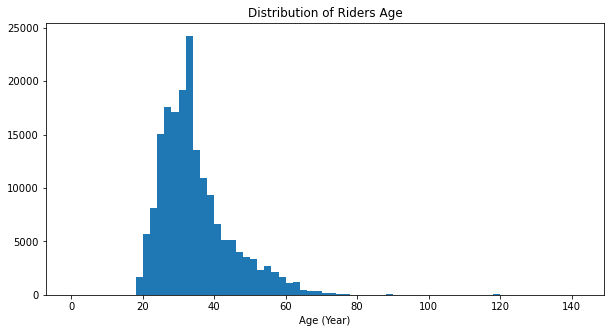

In [24]:
plt.figure(figsize = [10,5])
bins = np.arange(0, ford_df["age"].max()+2, 2)
plt.hist(data = ford_df, x = "age", bins = bins)

plt.title("Distribution of Riders Age")
plt.xlabel("Age (Year)");

> Without any form of scaling, it can be seen that most of the riders age fall between 20 and 40years

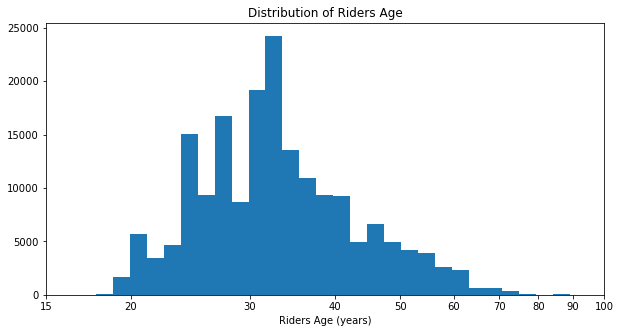

In [25]:
plt.figure(figsize = [10,5])

log_binsize = 0.025
bins = 10**np.arange(1.2, np.log10(ford_df["age"].max())+log_binsize, log_binsize)

plt.hist(data = ford_df, x = "age", bins = bins)
plt.xscale("log")

x_ticks = [15, 20, 30, 40,50, 60, 70, 80, 90, 100, 150]
plt.xticks(x_ticks, x_ticks)
plt.xlim(15, 100)

plt.title("Distribution of Riders Age")
plt.xlabel("Riders Age (years)");

> From having a log scale, most of the riders were around 30years of age. <br>
> Though from the distribution, some riders are way older than expected, with the highest age being 141, which can be concluded as outliers

In [26]:
# count of riders over 60 years of age
len(ford_df[ford_df["age"] > 60])

3530

> 3530 of the riders have age greater than 60

### Question5: When are most trips taken in terms of time of the day, day of the week or day of the month

In [27]:
# extract year, month, day, hour and weekday from start_time and end_time to get more insights

ford_df["start_month"] = ford_df.start_time.dt.strftime("%B")
ford_df["start_day"] = ford_df.start_time.dt.day
ford_df["start_hour"] = ford_df.start_time.dt.hour
ford_df["start_weekday"] = ford_df.start_time.dt.strftime("%A")


ford_df["end_month"] = ford_df.end_time.dt.strftime("%B")
ford_df["end_day"] = ford_df.end_time.dt.day
ford_df["end_hour"] = ford_df.end_time.dt.hour


In [28]:
# using cut to get the time of the day from the start_hour

bins = [0,5,12,16,20,24]
labels = ['Early Morning','Morning','Afternoon','Evening','Night']
ford_df['period'] = pd.cut(ford_df['start_hour'], bins=bins, labels=labels, include_lowest=True)

In [29]:
len(ford_df.query("period == 'Evening'")["start_hour"])

55004

In [30]:
# convert startweekday and period into ordered categorical types
ordinal_var_dict = {'start_weekday': ['Monday','Tuesday','Wednesday','Thursday', "Friday", "Saturday", 'Sunday'],
                    'period': ['Early Morning','Morning','Afternoon','Evening','Night'],}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    ford_df[var] = ford_df[var].astype(ordered_var)

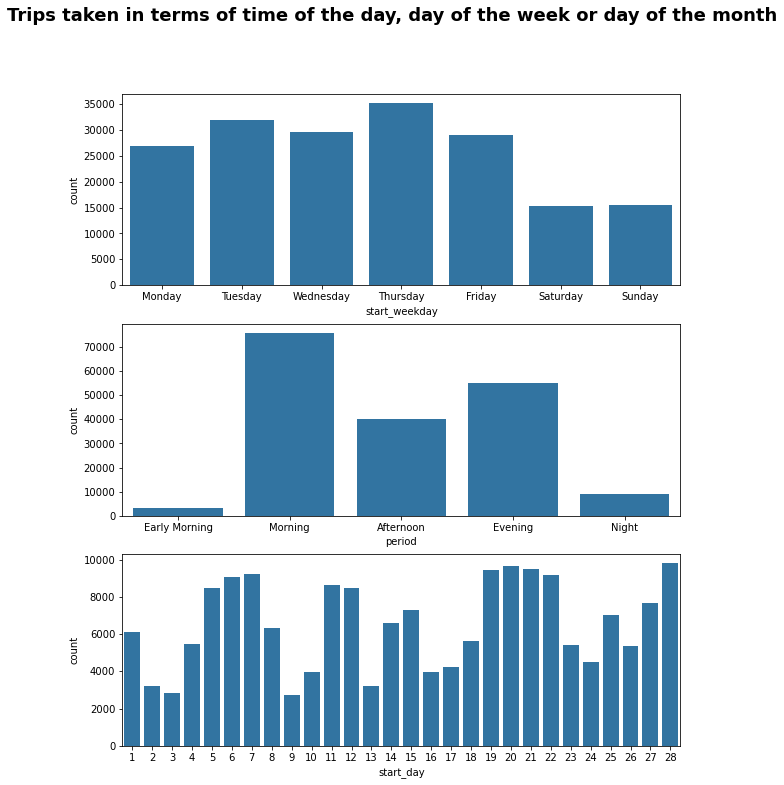

In [31]:
fig, ax = plt.subplots(nrows=3, figsize = [10,12])

base_color = sb.color_palette()[0]
sb.countplot(data = ford_df, x = 'start_weekday', color = base_color, ax = ax[0])
sb.countplot(data = ford_df, x = 'period', color = base_color, ax = ax[1])
sb.countplot(data = ford_df, x = 'start_day', color = base_color, ax = ax[2])

plt.suptitle("Trips taken in terms of time of the day, day of the week or day of the month", fontsize=18, fontweight='bold')
plt.show()

> Most Rides occured during the weekdays, and least rides on weekedns. Though, thurday had the highest number of rides, followed by Tuesday, and the least being Saturday.<br>
> Also, most rides took place between early morning and Evening, bust mostly at morning, with the least being Early Morning. <br>
> Also, the last day of the month had the highest number of rides taken. Though a well established pattern cannot be observed, apart from the fact that weekends had the least trips.

### Question6: Start_station with the highest no of Rides

In [32]:
top_10_start_station = ford_df.start_station_name.value_counts().head(10)
top_10_start_station = top_10_start_station.rename_axis("start_station").reset_index(name="counts")
top_10_start_station

start_station  counts
0                               Market St at 10th St    3904
1  San Francisco Caltrain Station 2  (Townsend St...    3544
2                                 Berry St at 4th St    3052
3   Montgomery St BART Station (Market St at 2nd St)    2895
4       Powell St BART Station (Market St at 4th St)    2760
5  San Francisco Ferry Building (Harry Bridges Pl...    2710
6     San Francisco Caltrain (Townsend St at 4th St)    2703
7       Powell St BART Station (Market St at 5th St)    2327
8                              Howard St at Beale St    2293
9                            Steuart St at Market St    2283

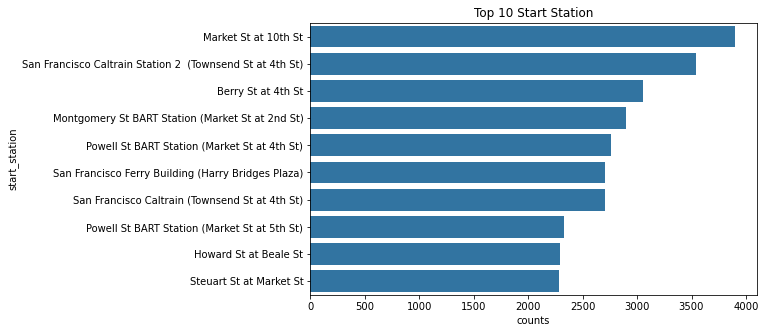

In [33]:
plt.figure(figsize = [8,5])
sb.barplot(data=top_10_start_station, y="start_station", x="counts", color=base_color)

plt.title("Top 10 Start Station");

> __Market St at 10th St__ came out as the station with the highest number of rides starting from that station, with 3904

## Bivariate Exploration

### Question6: Average Trip by User_Type

since most trips fall between 100 and 2000secs, i will be taking rides that falls between that range for the nexxt set of exploration


In [34]:
ford_sample = ford_df[ford_df["duration_sec"] <2000]
len(ford_sample)

177880

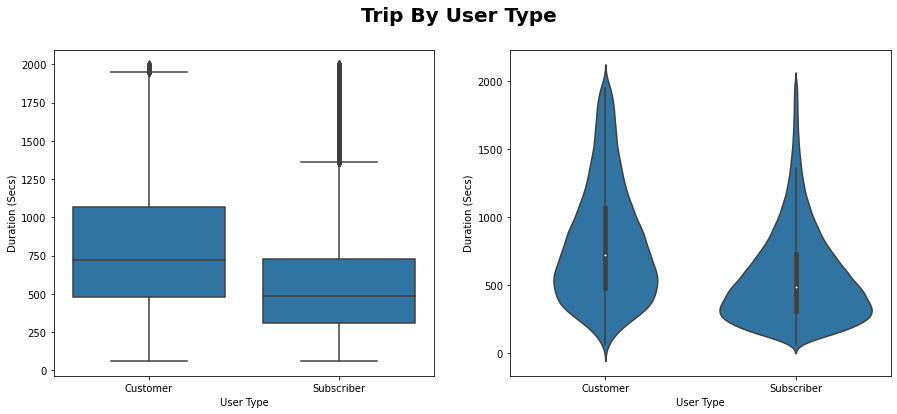

In [35]:
fig, ax = plt.subplots(1,2, figsize = [15,6])


base_color = sb.color_palette()[0]
sb.boxplot(data = ford_sample, x = "user_type", color = base_color, y = "duration_sec", ax = ax[0])
ax[0].set_ylabel("Duration (Secs)")
ax[0].set_xlabel("User Type")

sb.violinplot(data = ford_sample, x = "user_type", color = base_color, y = "duration_sec", ax = ax[1])
plt.suptitle("Trip By User Type", fontsize = 20, fontweight='bold')
ax[1].set_ylabel("Duration (Secs)")
ax[1].set_xlabel("User Type");


> Subscribers had the lowest average trip taken in secs, even though they had the highest distribution of riders

### Question7: Average Trip by Gender

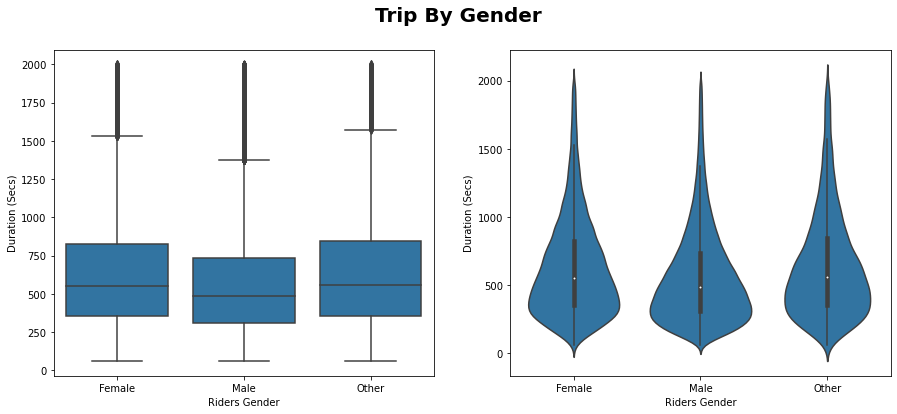

In [36]:
fig, ax = plt.subplots(1,2, figsize = [15,6])


base_color = sb.color_palette()[0]
sb.boxplot(data = ford_sample, x = "member_gender", color = base_color, y = "duration_sec", ax = ax[0])
ax[0].set_ylabel("Duration (Secs)")
ax[0].set_xlabel("Riders Gender")

sb.violinplot(data = ford_sample, x = "member_gender", color = base_color, y = "duration_sec", ax = ax[1])
ax[1].set_ylabel("Duration (Secs)")
ax[1].set_xlabel("Riders Gender")


plt.suptitle("Trip By Gender", fontsize = 20, fontweight='bold');

> Having the highest distribution of Riders, Male had the lowest average trip taken by secs.

### Question8: Average duration covered by weekdays and time of the Day

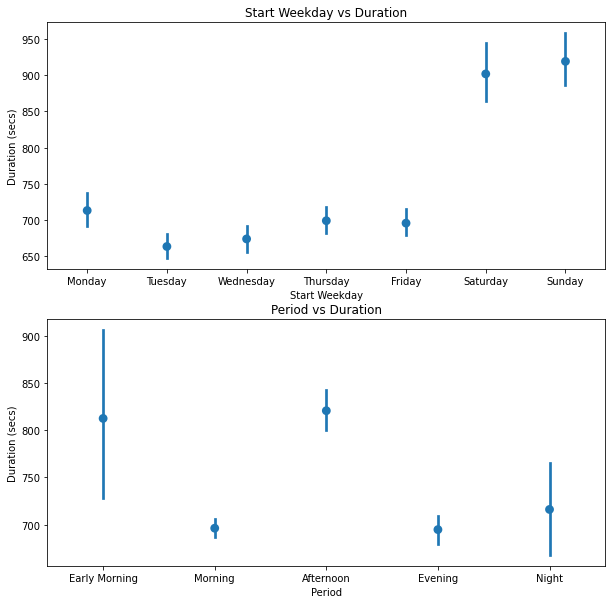

In [37]:
fig, ax = plt.subplots(nrows=2, figsize = [10,10])

sb.pointplot(data = ford_df, x = "start_weekday", y = "duration_sec", linestyles = "", ax = ax[0] )
ax[0].set_xlabel("Start Weekday")
ax[0].set_ylabel("Duration (secs)")
ax[0].set_title("Start Weekday vs Duration")

sb.pointplot(data = ford_df, x = "period", y = "duration_sec",linestyles = "", ax = ax[1])
ax[1].set_xlabel("Period")
ax[1].set_ylabel("Duration (secs)")
ax[1].set_title("Period vs Duration");

> Having the lowest rides, the highest avg duration (secs) occured on __Weekends__. Tuesday had the lowest avg duration covered. <br>
> The longest rides were covered during the **Afternoon**, with the lowest ride covered **morning** which had the highest number of rides taken

### Question9: Relationship between member_gender, user_type, start_weekday and Time of the day

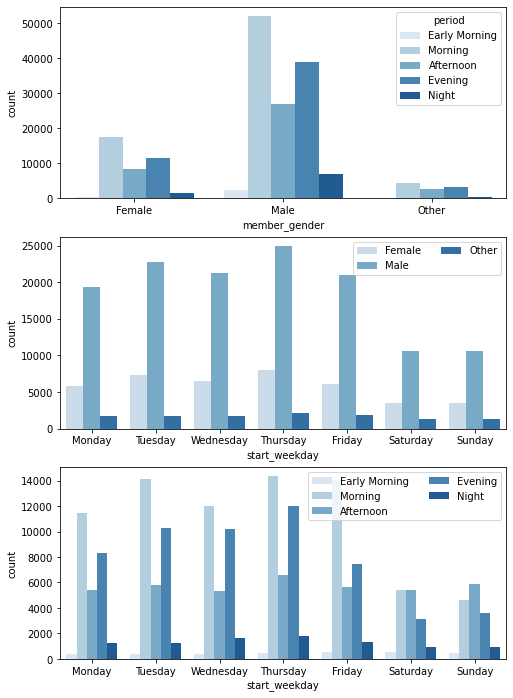

In [38]:
plt.figure(figsize = [8,12])
plt.subplot(3, 1, 1)
sb.countplot(data = ford_sample, x = "member_gender", hue = "period", palette = 'Blues')


ax = plt.subplot(3, 1, 2)
sb.countplot(data = ford_df,  x = "start_weekday", hue = "member_gender", palette = 'Blues')
ax.legend(ncol = 2)

ax = plt.subplot(3, 1, 3)
sb.countplot(data = ford_df,x = "start_weekday",  hue = "period", palette = 'Blues')
ax.legend(ncol =2 );

> On Weekend, majority of rides were taken in the afternnon, while on Weekdays, majority off rides are taken in the Evening, with close match during the day. <br>
> Majority of subscribers are male (this could be as a result of having higher number of males as riders compare to others), followed by female riders. <br>


### Question9: Bikers with the Least avg trip taken based on the top start_station (started and end at the same spot)

In [39]:
top_station = list(top_10_start_station.start_station)
top_station

['Market St at 10th St',
 'San Francisco Caltrain Station 2  (Townsend St at 4th St)',
 'Berry St at 4th St',
 'Montgomery St BART Station (Market St at 2nd St)',
 'Powell St BART Station (Market St at 4th St)',
 'San Francisco Ferry Building (Harry Bridges Plaza)',
 'San Francisco Caltrain (Townsend St at 4th St)',
 'Powell St BART Station (Market St at 5th St)',
 'Howard St at Beale St',
 'Steuart St at Market St']

In [40]:
def top_station_dur(station_name):
    df = ford_df.query("start_station_name == @station_name")
    if len(df)>2:
        df_order = df[["bike_id", "duration_sec"]].sort_values(by = "duration_sec", ascending = True).head(10)

        plt.figure(figsize = [7,6])
        sb.barplot(data = df_order, x = "bike_id", y = "duration_sec", palette = 'Blues')
        plt.xlabel("Bike ID")
        plt.ylabel("Duration (Secs)")
        plt.title("Bike Id with the least duration covered from {} and back".format(station_name));
        
    else:
        print("Cannot be plotted")

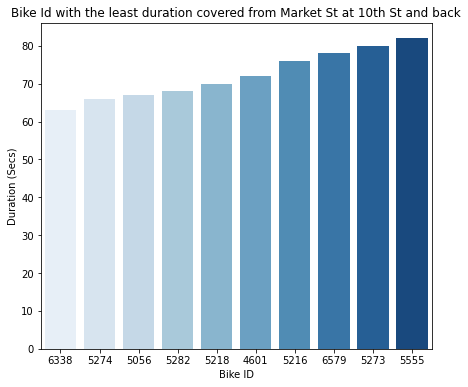

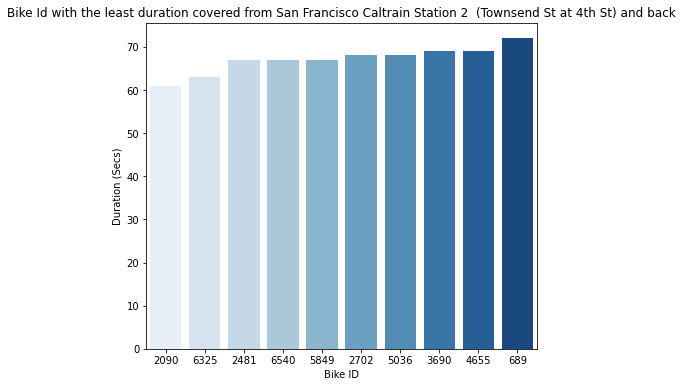

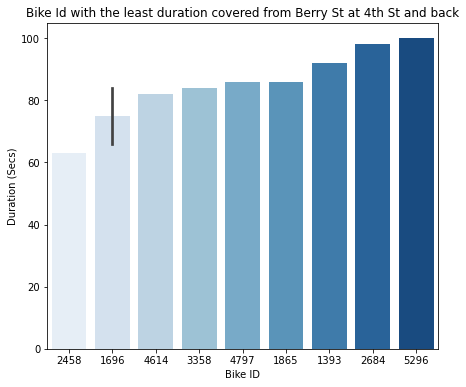

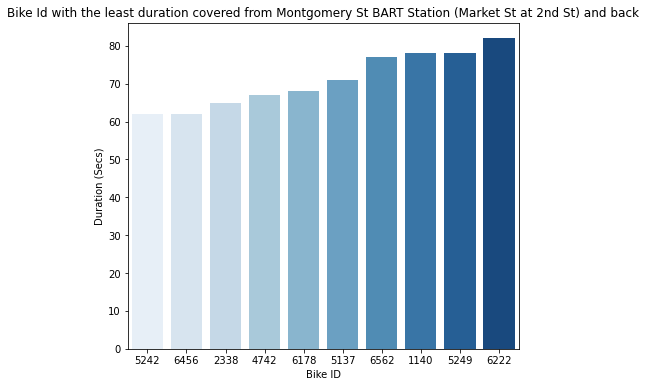

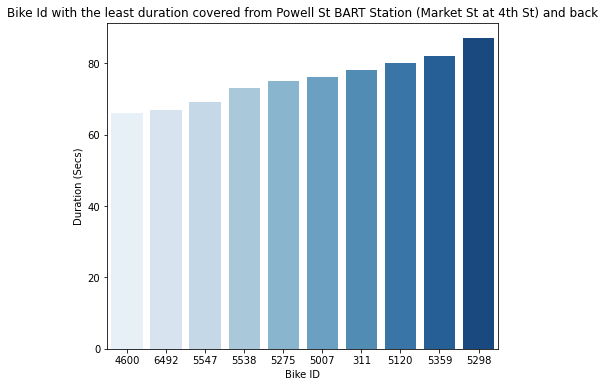

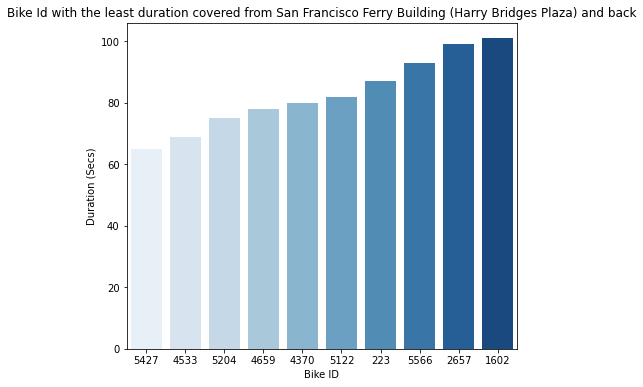

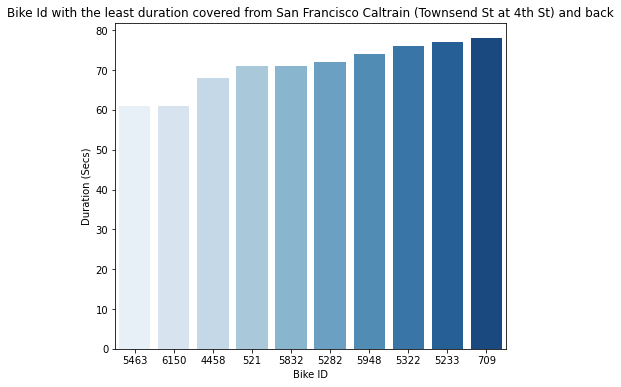

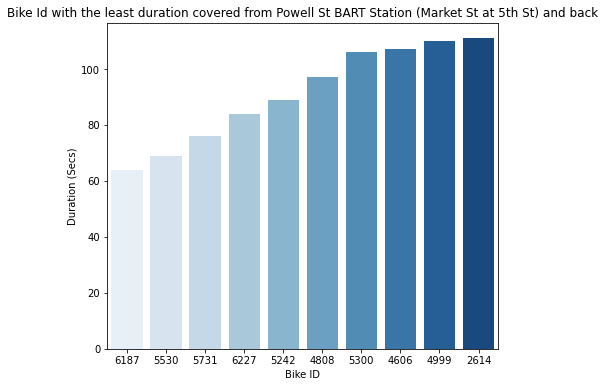

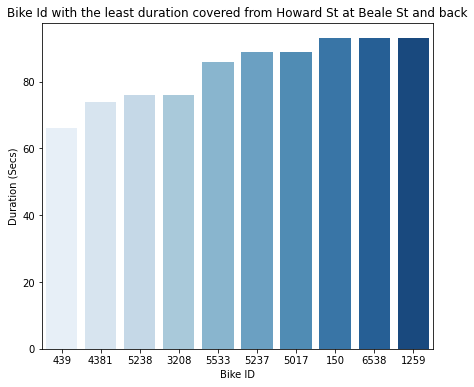

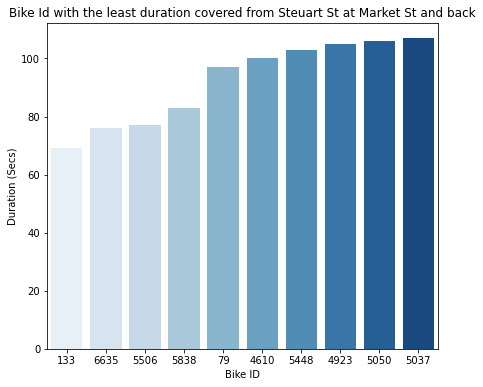

In [41]:
variables = list(top_10_start_station.start_station)

for i in range(len(variables)):
    var = variables[i]
    top_station_dur(var)


plt.show()

> Based on the trips taken in all top 10 stations, the least duration taken in all was between 60secs and 80secs for a single goride. <br>
The least duration accroding to the top 10 bike_riders was from 'San Francisco Caltrain Station 2  (Townsend St at 4th St) and back, falling below 75secs

### Question10: Age and Duration correlation with member_gender, user_type and start_weekday

<Figure size 432x288 with 0 Axes>

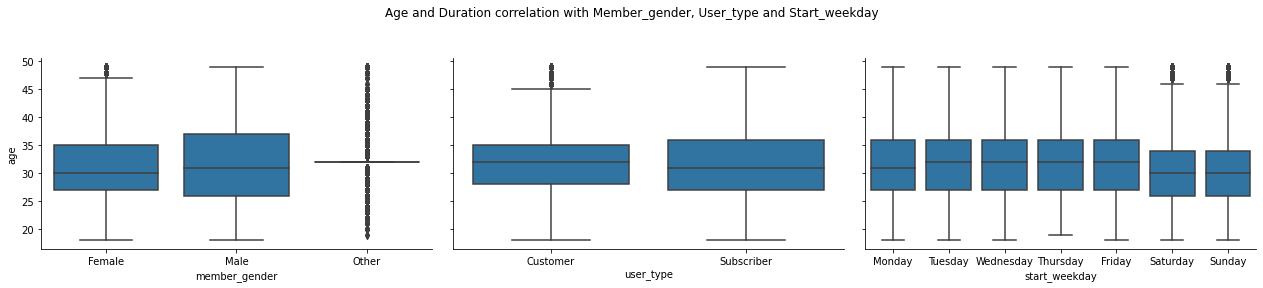

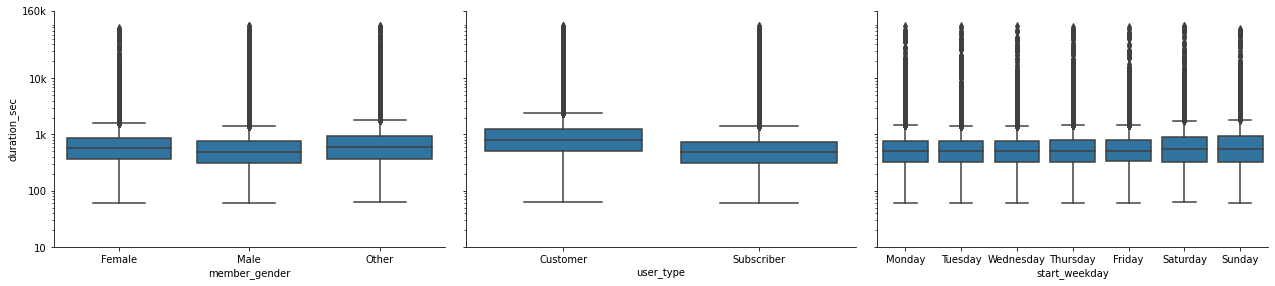

In [42]:
ford_sample_df = ford_df[ford_df["age"]<50] # getting a smaple of the dataframe with just riders less than 50years of age
categoric_vars = ["member_gender", "user_type", "start_weekday"]

def boxgrid(x, y, **kwargs):
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)

col = ['age', "duration_sec"]
for i in range(2):
    plt.subplots_adjust(top = 0.8)
    plt.suptitle("Age and Duration correlation with Member_gender, User_type and Start_weekday ")
    g = sb.PairGrid(data = ford_sample_df, y_vars = col[i], x_vars = categoric_vars,
                size = 4, aspect = 1.5)
    g.map(boxgrid)
    if col[i] == "duration_sec":
        plt.yscale("log")
        y_ticks = [10, 100,1000, 10000, 160e3]
        plt.yticks(y_ticks, [10, 100, "1k", "10k", "160k"]);

>Male riders had an average age older than female riders, could that be the reason for have a lower average duration time? The average age of the male riders was higher than.<br>
Customers were also older than subscribers and also had higher duration spent on trips. <br>
Weekends had younger riders, but had the highest average duration spent on trips.

## Multivariate Exploration

### Question11: Correlation between Some Major Variables

In [43]:
variables = ["duration_sec", "age","start_day", "start_hour",
            "member_gender", "start_weekday"]

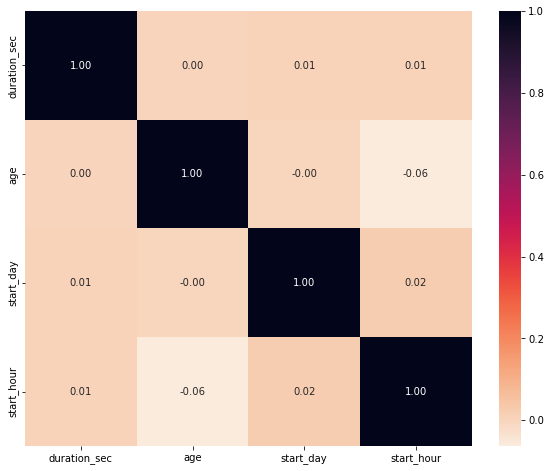

In [44]:
plt.figure(figsize = (10,8))
sb.heatmap(ford_df[variables].corr(), annot = True, cmap = "rocket_r", fmt = ".2f");

> From the heatmap above, none of the major varables are correlated with duration of trips

### Question12: Start_weekday correlation with User_type and Gender

<Figure size 432x288 with 0 Axes>

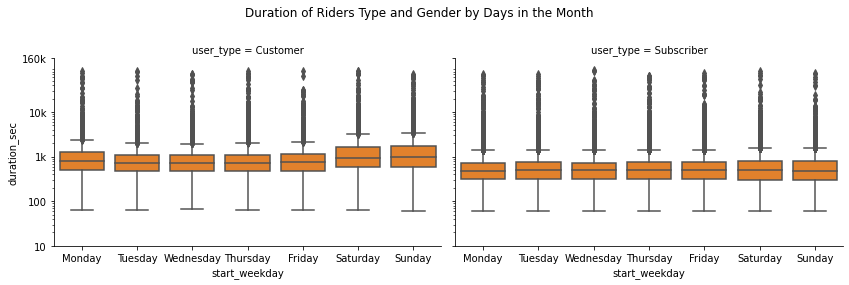

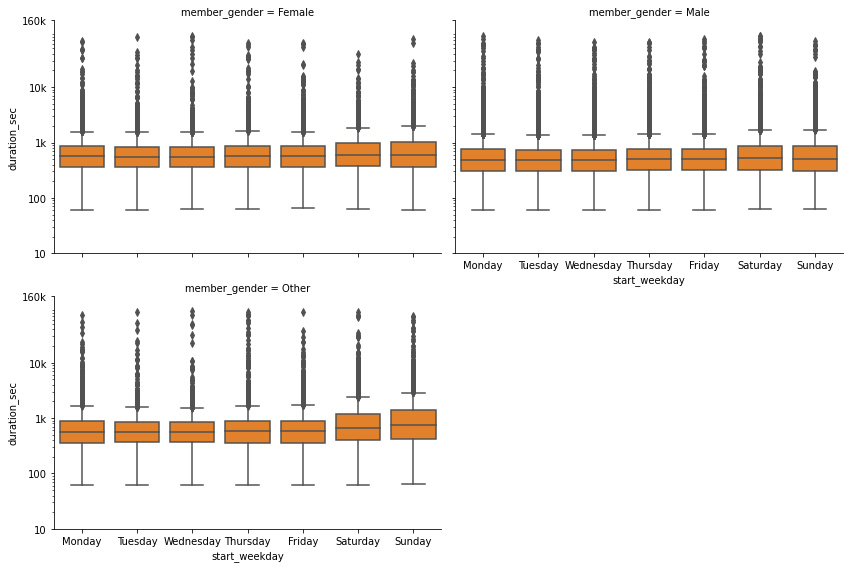

In [45]:
col = ["user_type", "member_gender"]

base_color = sb.color_palette()[1]

for i in range(2):
    plt.subplots_adjust(top = 0.8)
    plt.suptitle("Duration of Riders Type and Gender by Days in the Month \n")
    g = sb.FacetGrid(data = ford_df, col = col[i], margin_titles = True, col_wrap = 2, size = 4, aspect =1.5)
    g.map(sb.boxplot, "start_weekday", "duration_sec", color = base_color)

    plt.yscale("log")
    y_ticks = [10, 100,1000, 10000, 160e3]
    plt.yticks(y_ticks, [10, 100, "1k", "10k", "160k"]);

Getting more insights into the trips per days of the week by both gender and riders type,
> Customers had median duration increasing as the days of the week increases, going over 1000secs with increasing quartile, while subscribers had median duration all falling below 1000secs in all days in the recorded month. <br>
> All Gender had their median and quatile duration increasing with increase in the days of the week, but both Male and Female Gender had their median duration less than 1000secs, with Male having their median duration lesser than that of Female. The gender specified as others had some days of the week with median duration greater than 1000secs.

### Question13: Start_day correlation with User_type and Gender

<Figure size 432x288 with 0 Axes>

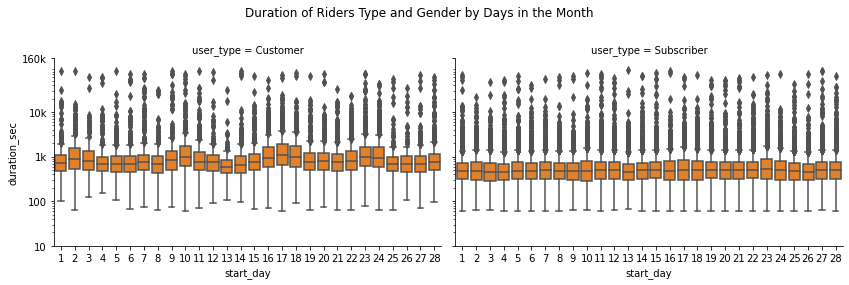

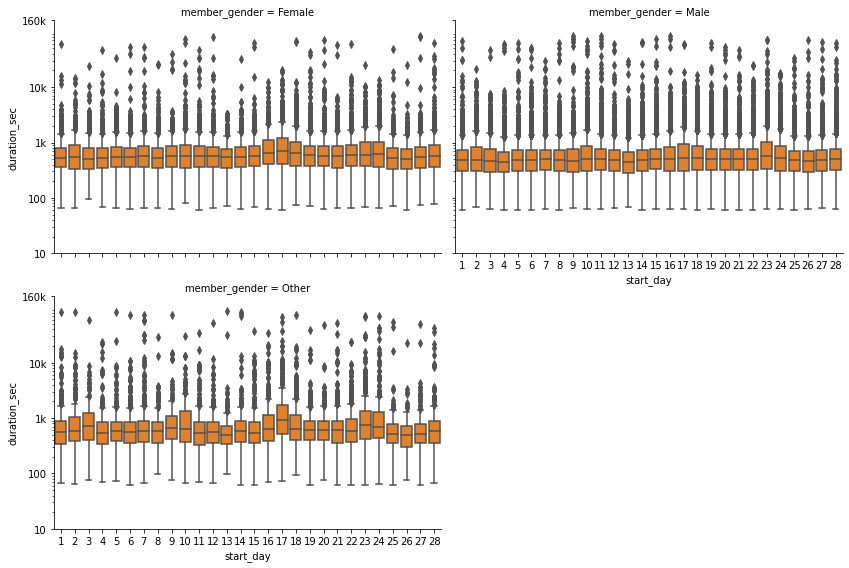

In [46]:
col = ["user_type", "member_gender"]

for i in range(2):
    plt.subplots_adjust(top = 0.8)
    plt.suptitle("Duration of Riders Type and Gender by Days in the Month \n")
    g = sb.FacetGrid(data = ford_df, col = col[i], margin_titles = True, col_wrap = 2, size = 4, aspect =1.5)
    g.map(sb.boxplot, "start_day", "duration_sec", color = base_color)

    plt.yscale("log")
    y_ticks = [10, 100,1000, 10000, 160e3]
    plt.yticks(y_ticks, [10, 100, "1k", "10k", "160k"]);


Getting more insights into the trips per day by both gender and riders type,
> Customers had median duration greater than 1000secs in some days, while subscribers had median duration all falling below 1000secs in all days in the recorded month. <br>
> Both Male and Female Gender had their median duration less than 1000secs, but can be seen that Male had their median duration lesser than that of Female in some days (though it can be noted the male riders are more than the female riders), while the gender specified as others had some days having median duration greater than 1000secs.

Specifying for just the days of the week showed there was increase in the duration with increase in the days, but drilling down to the days in the month showed the specific days that had higher median duration.

### Question14: Correlation between Age and Duration spent by Gender

In [47]:
ford_plot_data = ford_df.loc[ford_df["member_gender"].isin(["Female", "Male"])]
ford_plot_data = ford_plot_data.sample(3000)

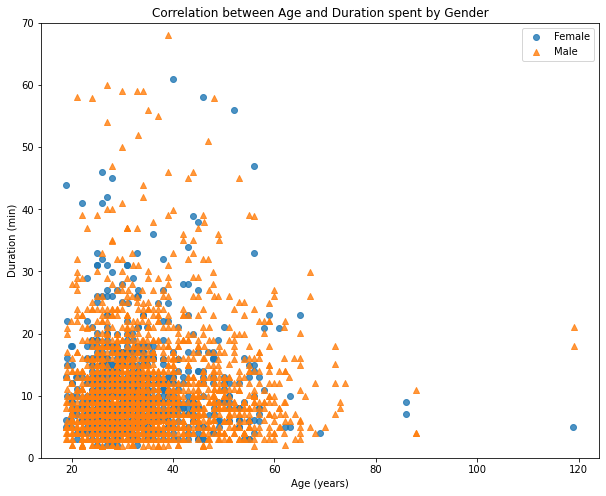

In [48]:
gender_marker = [["Female", "o"], 
                 ["Male", "^"]]
plt.figure(figsize = [10,8])
for gender, marker in gender_marker:
    plot_df = ford_plot_data.loc[ford_plot_data["member_gender"] == gender]
    sb.regplot(data = plot_df, x = "age", y ="duration_min", 
              fit_reg = False, x_jitter = 0.04,y_jitter = 0.04, marker = marker,)
plt.legend(["Female", "Male"])
plt.ylim(0,70)
plt.xlabel("Age (years)")
plt.ylabel("Duration (min)")
plt.title("Correlation between Age and Duration spent by Gender");

> From the scatter plot above, it can be noted that there is no correlation between age and duration spend, plotting by Gender 

### Question15: Average duration taken by each gender at different time of the day

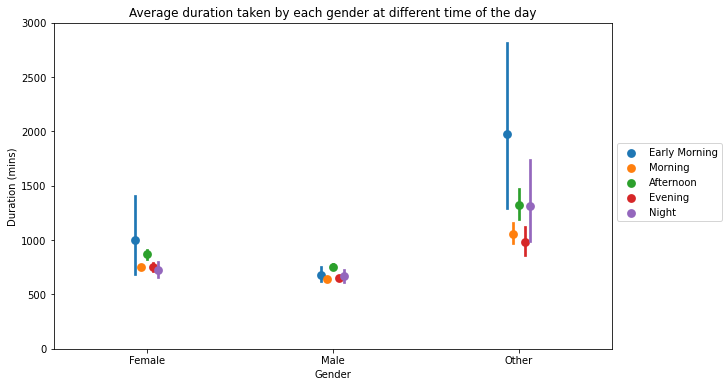

In [49]:
plt.figure(figsize = [10,6])
sb.pointplot(data = ford_df, x = "member_gender", y = "duration_sec", hue = "period",
            linestyles = "", dodge = True)
plt.legend(loc = 6, bbox_to_anchor = (1.0, 0.51))
plt.ylim(0, 3000)
plt.xlabel("Gender")
plt.ylabel("Duration (mins)")
plt.title("Average duration taken by each gender at different time of the day");

> Females riders had the least average ride at Night and the longest ride early morning, taking above 1000secs. <br>
Male riders have an almost equal number of average duration ride throughout the time period, but having morning as the least duration. Though from the bivariant plot above, male had more rides in the morning compared to afternnons<br>
Other gender had their least duration in the evening and the highest early morning.<br>


## Conclusions
Majority of rides were taken on weekdays and the least on weekends.
Having more subcribers than customers, subscibers had the least duration in secs. This could be that they had more reason to participate in the rides.
Male riders had the least duration of ride in every possible feature specified (either by weekday or period or day of the month). Specifying for just the days of the week showed there was increase in the duration with increase in the days, but drilling down to the days in the month showed the specific days that had higher median duration, as well as drilling down to the time of the day showed that females has the highest average rides in the morning, which is almost like the least for Male riders


Though it can be suprisingly noted that there is no correlation between age and durations of rides, working on just the male and female gender
